In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(41)
sns.set()

In [2]:
df = pd.read_csv('mall-customer.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
X = df.iloc[:, -2:].values
X.shape

(200, 2)

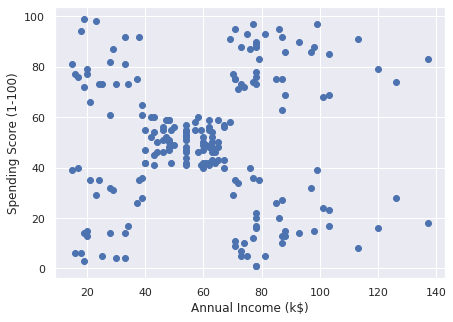

In [4]:
plt.figure(figsize = (7, 5))
plt.scatter(X[:,0], X[:, 1])
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.show()

# Choose K and take random 5 centroid .

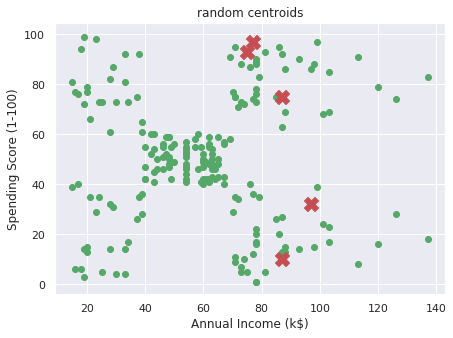

In [48]:

K = 5
r_centroids = X[np.random.randint(0, X.shape[0], size=(5))]
plt.figure(figsize = (7, 5))
plt.scatter(X[:,0], X[:, 1], c = 'g')
plt.scatter(r_centroids[:,0], r_centroids[:,1], color='r',marker='X', s=200)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('random centroids')
plt.show()


# Take weighted Centroid . 

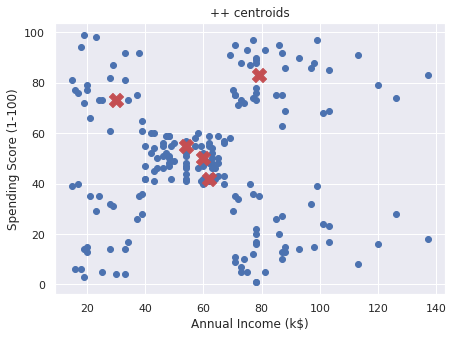

In [60]:
pp_centroids = np.array([X[np.random.randint(0,X.shape[0])]])
for i in range(1, K, 1):
    D = np.array([np.sqrt(np.sum((x - pp_centroids) ** 2)) for x in X])
    prob = D / np.sum(D)
    cummulative_prob = np.cumsum(prob)
    r=np.random.random()
    s = np.where(cummulative_prob > r)[0][0]
    pp_centroids=np.append(pp_centroids,[X[s]],axis=0)   
pp_centroids

plt.figure(figsize = (7, 5))
plt.scatter(X[:,0], X[:, 1], c = 'b')
plt.scatter(pp_centroids[:,0], pp_centroids[:,1], color='r',marker='X', s=200)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('++ centroids')
plt.show()

In [61]:
from matplotlib import animation

In [62]:
CENTROID = r_centroids.astype('float')
def training(epoch):
    euclidean_distance = np.array([np.sqrt(np.sum((X-CENTROID[k,:])**2,axis=1)) for k in range(K)]).T
    C = np.argmin(euclidean_distance,axis=1)
    for k in range(K):
        mean = X[C == k].mean(axis = 0)
        CENTROID[k] = mean
    line.set_offsets(CENTROID)
    ax.set_title('random centroids, iteration %d'%(epoch))
    return line, ax




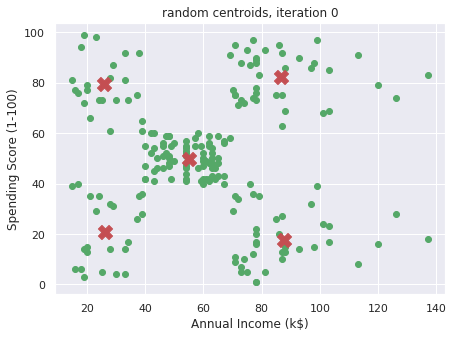

In [63]:
fig = plt.figure(figsize = (7, 5))
ax = plt.axes()
ax.scatter(X[:,0], X[:, 1], c = 'g')
line = ax.scatter([],[], color='r',marker='X', s=200)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_title('random centroids')

anim = animation.FuncAnimation(fig, training, frames=20, interval=200)
anim.save('random-centroids.gif', writer='imagemagick', fps=5)

In [64]:
CENTROID = pp_centroids.astype('float')
def training(epoch):
    euclidean_distance = np.array([np.sqrt(np.sum((X-CENTROID[k,:])**2,axis=1)) for k in range(K)]).T
    C = np.argmin(euclidean_distance,axis=1)
    for k in range(K):
        mean = X[C == k].mean(axis = 0)
        CENTROID[k] = mean
    line.set_offsets(CENTROID)
    ax.set_title('++ centroids, iteration %d'%(epoch))
    return line, ax



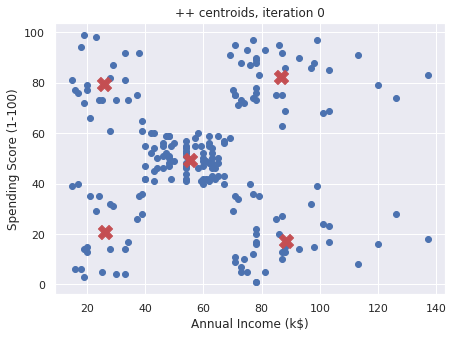

In [65]:
fig = plt.figure(figsize = (7, 5))
ax = plt.axes()
ax.scatter(X[:,0], X[:, 1], c = 'b')
line = ax.scatter([],[], color='r',marker='X', s=200)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_title('++ centroids')

anim = animation.FuncAnimation(fig, training, frames=20, interval=200)
anim.save('pp-centroids.gif', writer='imagemagick', fps=5)